# Final Project - Kevin Dai

## Objective:

In this project I will be working with the UCI heart disease dataset. Heart disease is one of the leading causes of mortality worldwide, accounting for significant financial and emotional challenges for healthcare professionals and families of the afflicted. Understanding risk factors for heart disease can help healthcare professionals identify potential pitfalls for patients and make early decisions in a patient's life, potentially averting disaster. Unfortunately traditional test and diagnostic methodology rely on invasive and labor intensive time consuming tasks.

This project seeks to address the challenge of heart disease risk prediction using machine learning models. By leveraging the Heart Disease UCI dataset, which contains key health metrics such as age, gender, cholesterol levels, and blood pressure, I aim to build a predictive system capable of identifying individuals at high risk for heart disease.


# Key questions/goals:

* What are the most significant predictors of heart disease risk based on the dataset?
* Is there a machine learning model that accurately classifies individuals with and without heart disease?
* Is there a relationship with features in the dataset and heart disease risk?
* Is it possible to create a classification model for heart disease?


# Planned solutions:
* Understand the structure of the data.
* Identify and handle any missing data.
* Identify correlations and key features.
* Implement multiple ML models for classification and compare each model on metrics like F1, accuracy, precision, and recall
* Validate model using test dataset.
* Visualize key findings to interpret relationships with each feature and heart disease risk.


In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [120]:
data = pd.read_csv('heart_disease_uci.csv')

# Patient Dataset Information

| **Column**    | **Description** |
|----------------|-----------------|
| `id`          | Unique ID for each patient |
| `age`         | Age of the patient in years |
| `origin`      | Place of study |
| `sex`         | Male/Female |
| `cp`          | Chest pain type: [typical angina, atypical angina, non-anginal, asymptomatic] |
| `trestbps`    | Resting blood pressure (in mm Hg on admission to the hospital) |
| `chol`        | Serum cholesterol in mg/dl |
| `fbs`         | Fasting blood sugar > 120 mg/dl (True/False) |
| `restecg`     | Resting electrocardiographic results: [normal, stt abnormality, lv hypertrophy] |
| `thalach`     | Maximum heart rate achieved |
| `exang`       | Exercise-induced angina (True/False) |
| `oldpeak`     | ST depression induced by exercise relative to rest |
| `slope`       | The slope of the peak exercise ST segment |
| `ca`          | Number of major vessels (0-3) colored by fluoroscopy |
| `thal`        | [normal, fixed defect, reversible defect] |
| `num`         | The predicted attribute |


In [123]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Min/Max number of ID & Age

In [126]:
data['id'].min(), data['id'].max()

(1, 920)

In [128]:
data['age'].min(), data['age'].max()

(28, 77)

* ID's range from 1 to 920
* The maximum age of the dataset is 77 years old while the min is 28.

## Data Distributions

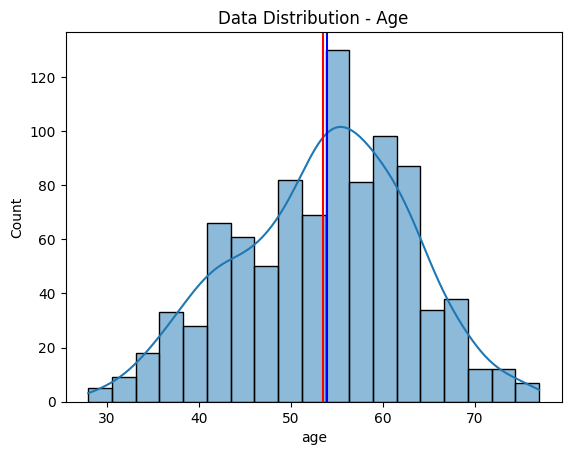

Mean age:  53.51086956521739
Median age:  54.0


In [132]:
sns.histplot(data['age'], kde=True)
plt.title('Data Distribution - Age')
plt.axvline(data['age'].mean(),color='red')
plt.axvline(data['age'].median(),color='blue')

plt.show()

print('Mean age: ', data['age'].mean())
print('Median age: ', data['age'].median())

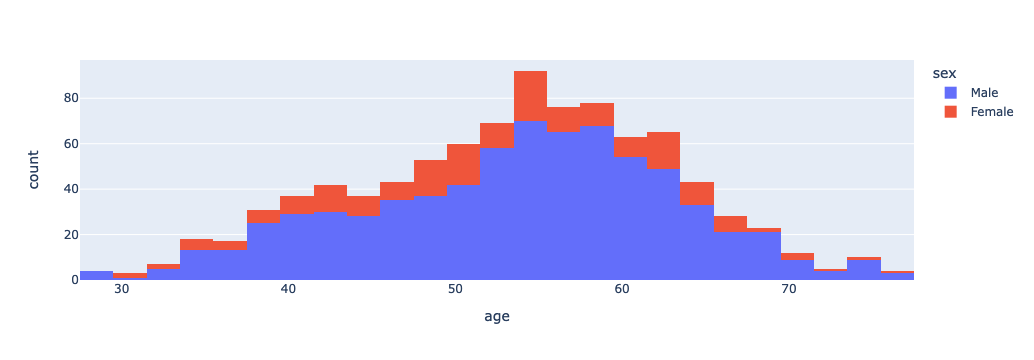

Counts by Sex:  sex
Male      726
Female    194
Name: count, dtype: int64


In [133]:
fig = px.histogram(data_frame=data, x='age', color='sex')
fig.show()
print('Counts by Sex: ', data['sex'].value_counts())

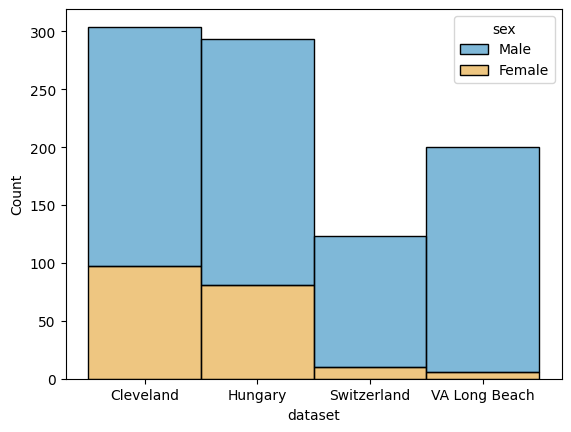

dataset        sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      194
               Female      6
Name: count, dtype: int64
--------------------------
The Mean of Data set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
--------------------------
The Median of Data set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64


In [136]:
sns.histplot(data=data, x='dataset',hue='sex',alpha = 0.5,palette = 'colorblind',multiple='stack')
plt.show()
print(data.groupby('dataset')['sex'].value_counts())
print('--------------------------')
print('The Mean of Data set:',data.groupby('dataset')['age'].mean())
print('--------------------------')
print('The Median of Data set:',data.groupby('dataset')['age'].median())

* The median age is 54 and the mean age is ~53
* The distribution of sex is not even there is a heavy bias towards men in this dataset (726 male vs 194 female)
* Total dataset is a combination of smaller datasets from Cleveland, Hungary, Switzerland and VA Long Beach.
* Each sub-dataset is biased towards male

## Chestpain Col

In [26]:
data['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [28]:
data.groupby('cp')['sex'].value_counts()

cp               sex   
asymptomatic     Male      426
                 Female     70
atypical angina  Male      113
                 Female     61
non-anginal      Male      151
                 Female     53
typical angina   Male       36
                 Female     10
Name: count, dtype: int64

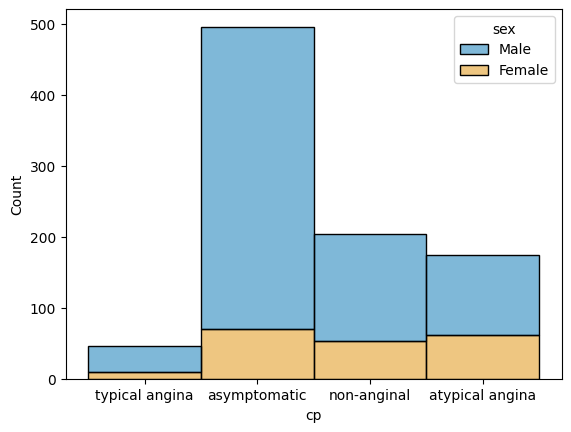

In [30]:
sns.histplot(data=data,x='cp', hue = 'sex',palette = 'colorblind',alpha=0.5,multiple = 'stack'
            )
plt.show()

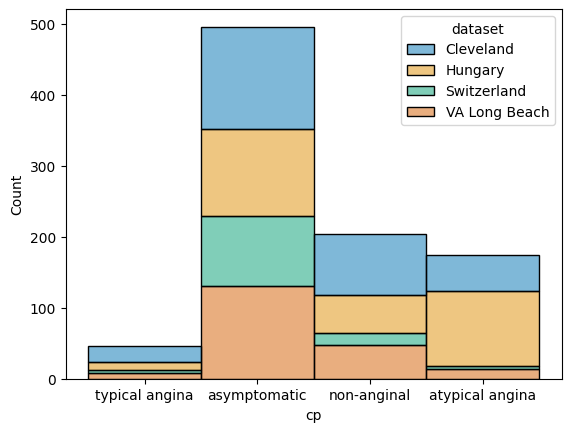

In [32]:
sns.histplot(data=data,x='cp', hue = 'dataset',palette = 'colorblind',alpha=0.5,multiple = 'stack'
            )
plt.show()

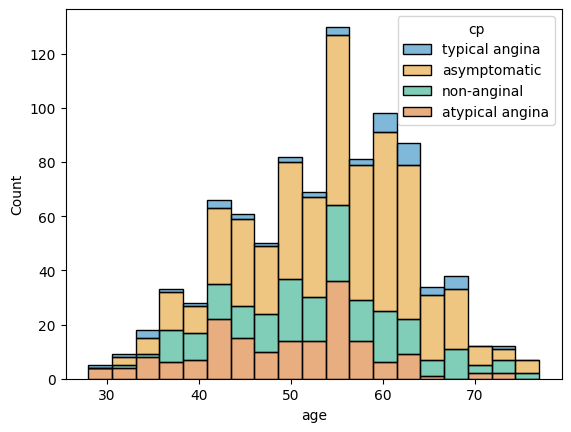

In [34]:
sns.histplot(data=data,x='age', hue = 'cp',palette = 'colorblind',alpha=0.5,multiple = 'stack'
            )
plt.show()

* Asymptomatic has the highest number of individuals compared to the others

## Looking into the num col (Presence of heart disease)

In [37]:
data['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [39]:
data.groupby(data['num'])[['dataset']].value_counts()

num  dataset      
0    Hungary          187
     Cleveland        165
     VA Long Beach     51
     Switzerland        8
1    Hungary          106
     VA Long Beach     56
     Cleveland         55
     Switzerland       48
2    VA Long Beach     41
     Cleveland         36
     Switzerland       32
3    VA Long Beach     42
     Cleveland         35
     Switzerland       30
4    Cleveland         13
     VA Long Beach     10
     Switzerland        5
Name: count, dtype: int64

In [41]:
grouped_counts = data.groupby(['num', 'dataset', 'sex']).size().reset_index(name='count')

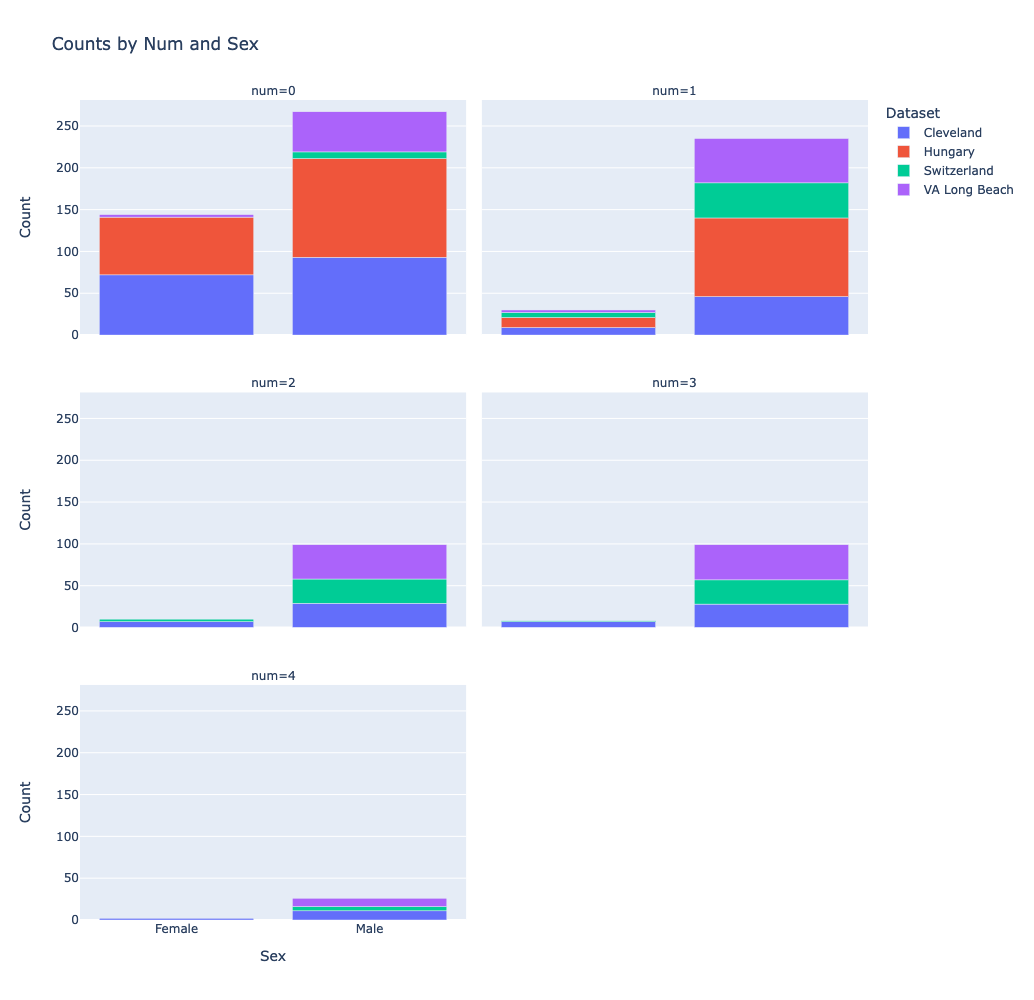

In [43]:
fig = px.bar(grouped_counts, x='sex', y='count', color='dataset',
             facet_col='num', facet_col_wrap=2,
             labels={'sex': 'Sex', 'count': 'Count', 'dataset': 'Dataset'},
             title='Counts by Num and Sex')
fig.update_layout(
    width=1000,  
    height=1000   
)

fig.show()

* Num column is the most important column in this dataset as it categorizes the data into heart diseases progression:
* num = 0, no heart disease
* num = 1, stage 1
* num = 2, stage 2
* num = 3, stage 3
* num = 4, stage 4

* There are 411 individuals without heart disease
* 265 are in the early stages (stage 1)
* 109 are in stage 2
* 107 are in stage 3
* 28 are in late stage (stage 4)

## Numerical column correlations

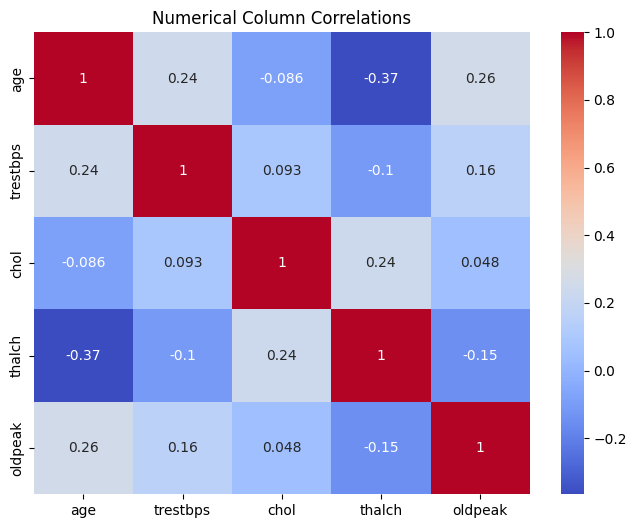

In [46]:
df_corr = ['age','trestbps','chol','thalch','oldpeak']

plt.figure(figsize=(8, 6))
sns.heatmap(data[df_corr].corr(), annot=True, cmap='coolwarm')
plt.title('Numerical Column Correlations')
plt.show()

* There is a moderate negative correlation between age and thalach (maximum heart rate achieved). This suggests that older individuals tend to have lower maximum heart rates
* There is a weak positive correlation between age and trestbps (resting blood pressure). This indicates that, as age increases, there is a tendency for resting blood pressure to also increase slightly.
* There is a weak positive correlation between thalach (maximum heart rate achieved) and cholesterol (chol). Although this correlation is not very strong, it suggests a slight relationship between higher cholesterol levels and higher maximum heart rates.

## See if there are missing data

In [50]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

data.isnull().sum().sort_values(ascending=False)
missing_data_cols=data.isnull().sum()[data.isnull().sum()>0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

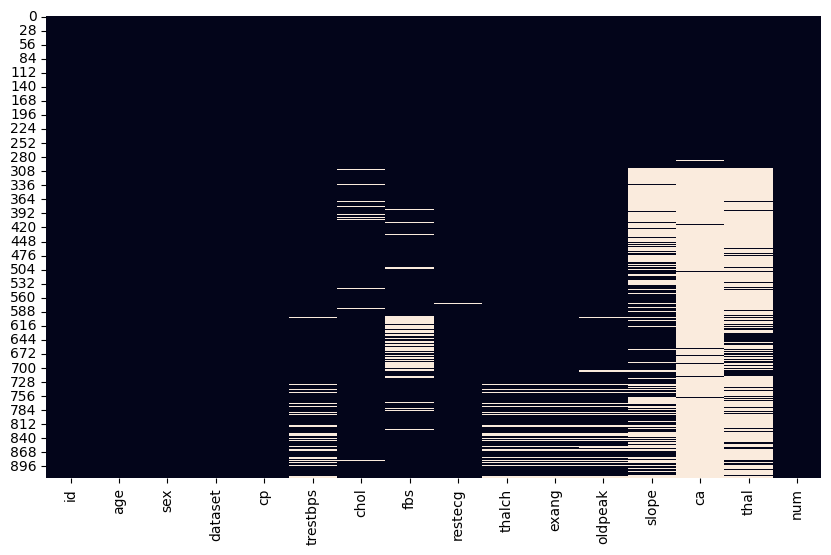

In [52]:
plt.figure( figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

* High amounts of missing data in slope,ca,thal columns.
* Missing values in around 10 total columns.

## Very Basic way to impute data

In [55]:
def simple_impute_missing_data(df):
    numeric_imputer = SimpleImputer(strategy='median')
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])
    
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])
    
    return df

data = simple_impute_missing_data(data)


In [57]:
data.isnull().value_counts()

id     age    sex    dataset  cp     trestbps  chol   fbs    restecg  thalch  exang  oldpeak  slope  ca     thal   num  
False  False  False  False    False  False     False  False  False    False   False  False    False  False  False  False    920
Name: count, dtype: int64

* Here I try imputing some of the data.
* Numeric column values were imputed with median number in each column
* Categorical columns were imputed with most frequent values

## Find any outliers

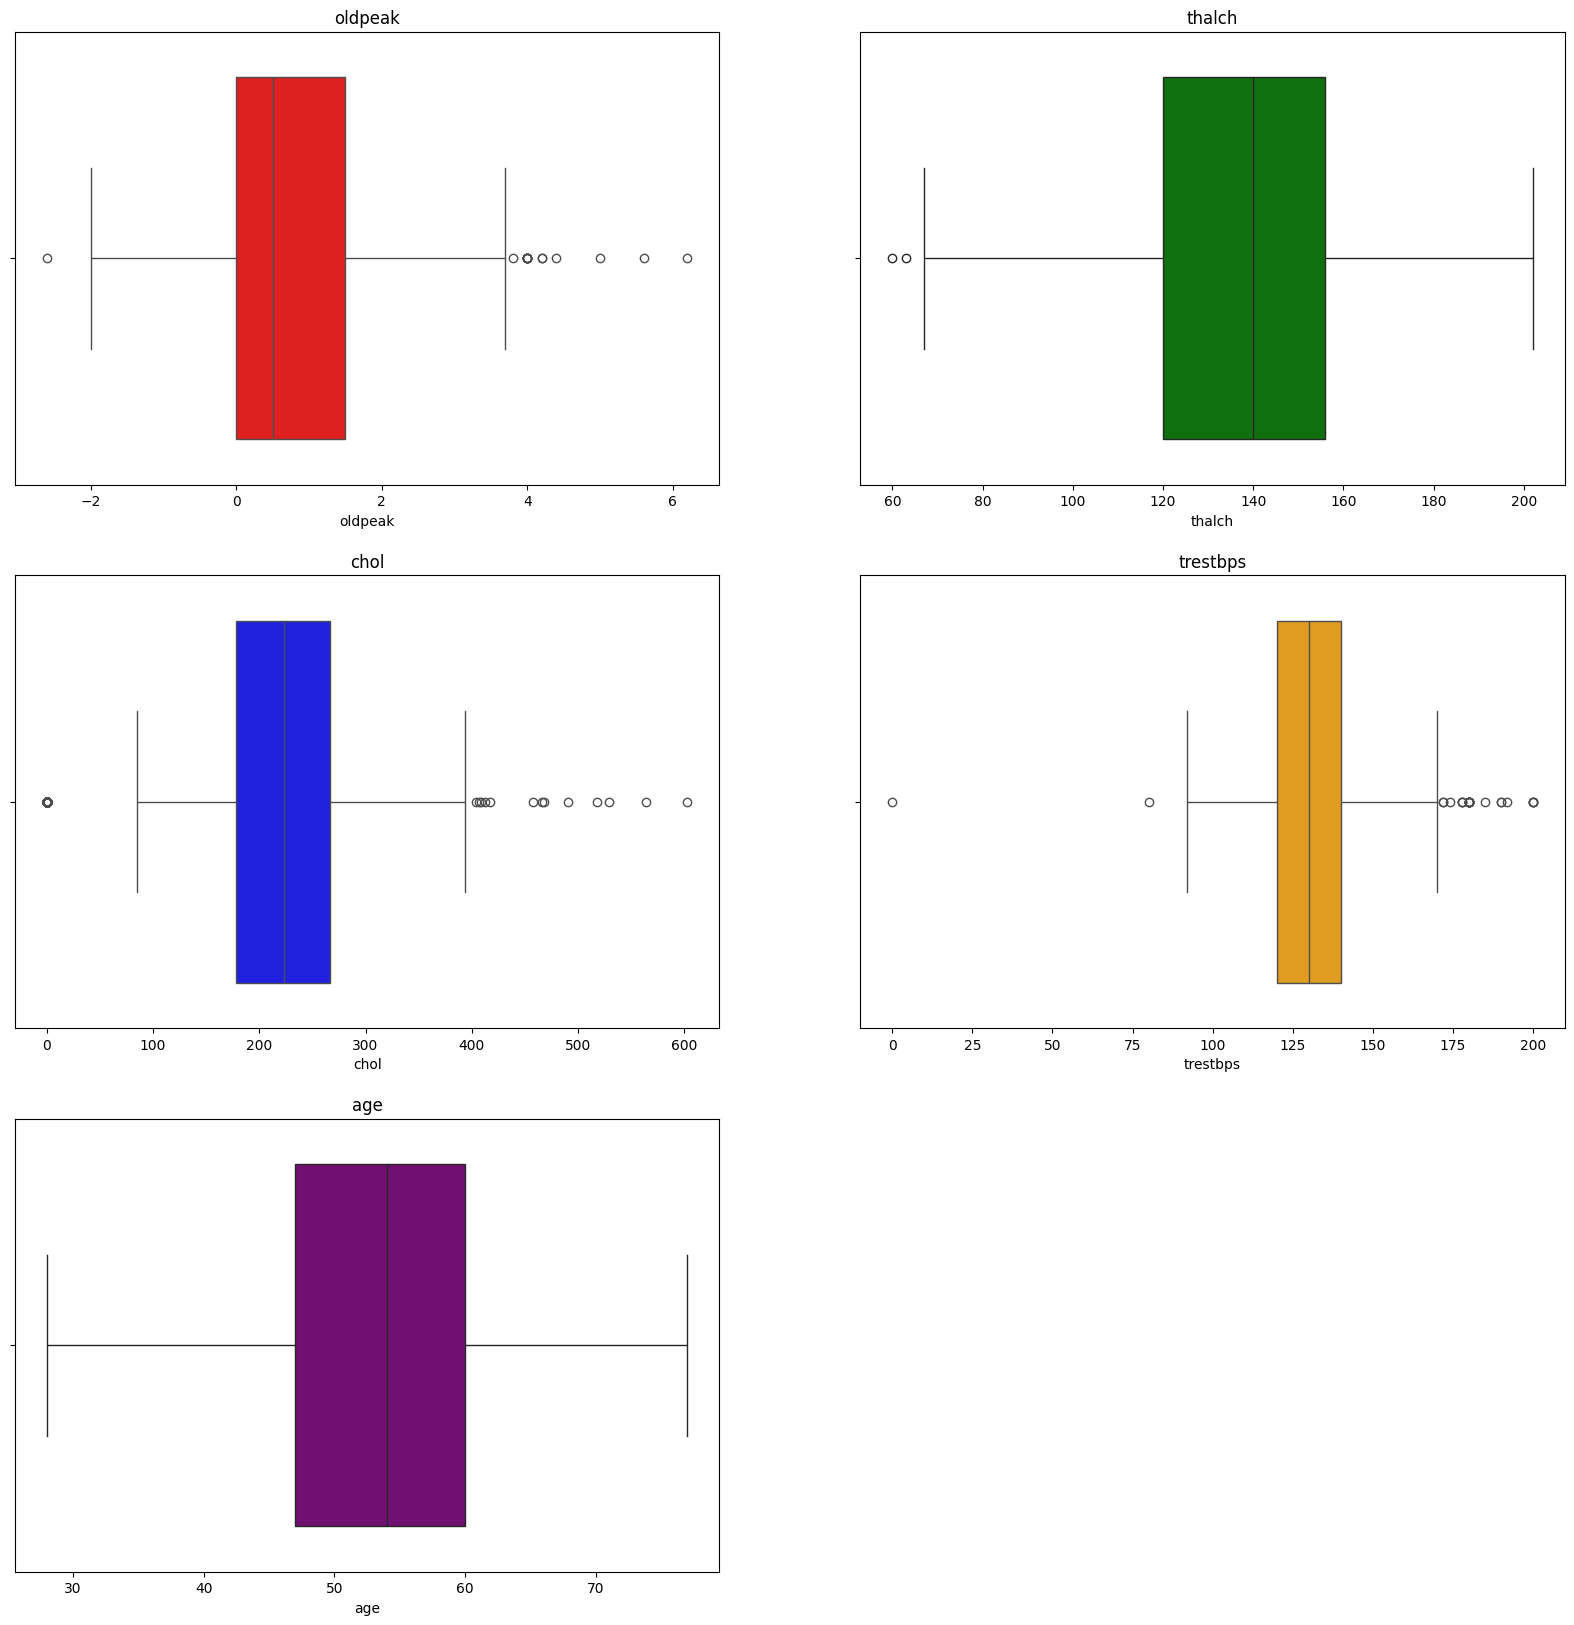

In [60]:
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=data[col], color=colors[i])
    plt.title(col)
plt.show()

In [62]:
# Tresbps has a single value of 0 going to remove it
data[data['trestbps'] == 0]
data = data[data['trestbps'] != 0]

In [64]:
(data['chol'] == 0).sum()

171

In [66]:
data.duplicated().sum()

0

* Oldpeak has a few outliers that appear to be plausible values, possibly indicating meaningful variations in patient response or disease severity, so they are retained for further analysis
* trestbps (Resting blood pressure) has only one point at 0 which is not realistic which is why I removed it from the dataset.
* Chol has points with value of 0 as well but because there are 171 data points I do not remove them.
* Age has no outliers

## Scaling of numerical cols
* want to scale all numerical features before machine learning. 

In [69]:
columns_to_scale = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
min_max_scalers = {}

for col in columns_to_scale:
    scaler = MinMaxScaler()

    data[col] = scaler.fit_transform(data[[col]])

    min_max_scalers[col] = scaler

## Encoding cat cols
* encodes all categorical columns before machine learning.

In [72]:
columns_to_encode = ['thal', 'ca', 'dataset','slope', 'exang', 'restecg','fbs', 'cp', 'sex','num']
label_encoders = {}

for col in columns_to_encode:
    label_e = LabelEncoder()

    data[col] = label_e.fit_transform(data[col])

    # Store the encoder in the dictionary
    label_encoders[col] = label_e

In [74]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,0.714286,1,0,3,0.541667,0.386401,1,0,0.633803,0,0.556818,0,0,0,0
1,2.0,0.795918,1,0,0,0.666667,0.474295,0,0,0.338028,1,0.465909,1,3,1,2
2,3.0,0.795918,1,0,0,0.333333,0.379768,0,0,0.485915,1,0.590909,1,2,2,1
3,4.0,0.183673,1,0,2,0.416667,0.414594,0,1,0.894366,0,0.693182,0,0,1,0
4,5.0,0.265306,0,0,1,0.416667,0.338308,0,0,0.788732,0,0.454545,2,0,1,0


# Machine Learning
* Split the data into test and training
* Impliment Logistic Regression, random forest and XGB

In [76]:
X = data[['age','sex','dataset','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','ca']]
y = data['num']
X_train ,X_test ,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

In [89]:
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.53

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       117
           1       0.44      0.48      0.46        87
           2       0.27      0.09      0.14        33
           3       0.26      0.18      0.21        34
           4       0.00      0.00      0.00         5

    accuracy                           0.53       276
   macro avg       0.33      0.31      0.31       276
weighted avg       0.48      0.53      0.50       276



In [91]:
data
def impute_categorical_missing_data(passed_col):
    
    df_null = data[data[passed_col].isnull()]
    df_not_null = data[data[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = data[data[passed_col].isnull()]
    df_not_null = data[data[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]


In [82]:
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((data[col].isnull().sum() / len(data)) * 100, 2))+"%")
    if col in categorical_cols:
        data[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        data[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 0.0%


NameError: name 'IterativeImputer' is not defined

In [85]:
data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [857]:
data.groupby('trestbps')['sex'].value_counts()

trestbps  sex
0.000000  1      1
0.100000  1      1
0.116667  0      1
          1      1
0.125000  1      5
                ..
0.875000  1      1
0.916667  1      2
0.933333  1      1
1.000000  0      2
          1      2
Name: count, Length: 97, dtype: int64

In [862]:
bins=[0,60,80,130, 135, 140]
labels=['very_low', 'low','Normal', 'high', 'very_high']
data['trestbps_bins']=pd.cut(data['trestbps'], bins=bins, labels=labels)
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,trestbps_bins
0,1.0,0.714286,1,0,3,0.541667,0.386401,1,0,0.633803,0,0.556818,0,0,0,0,very_low
1,2.0,0.795918,1,0,0,0.666667,0.474295,0,0,0.338028,1,0.465909,1,3,1,2,very_low
2,3.0,0.795918,1,0,0,0.333333,0.379768,0,0,0.485915,1,0.590909,1,2,2,1,very_low
3,4.0,0.183673,1,0,2,0.416667,0.414594,0,1,0.894366,0,0.693182,0,0,1,0,very_low
4,5.0,0.265306,0,0,1,0.416667,0.338308,0,0,0.788732,0,0.454545,2,0,1,0,very_low


In [864]:
data['trestbps_bins'].fillna(data['trestbps_bins'].mode()[0], inplace=True)
data['trestbps_bins'].isnull().sum()
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,trestbps_bins
0,1.0,0.714286,1,0,3,0.541667,0.386401,1,0,0.633803,0,0.556818,0,0,0,0,very_low
1,2.0,0.795918,1,0,0,0.666667,0.474295,0,0,0.338028,1,0.465909,1,3,1,2,very_low
2,3.0,0.795918,1,0,0,0.333333,0.379768,0,0,0.485915,1,0.590909,1,2,2,1,very_low
3,4.0,0.183673,1,0,2,0.416667,0.414594,0,1,0.894366,0,0.693182,0,0,1,0,very_low
4,5.0,0.265306,0,0,1,0.416667,0.338308,0,0,0.788732,0,0.454545,2,0,1,0,very_low


<Axes: xlabel='trestbps', ylabel='Count'>

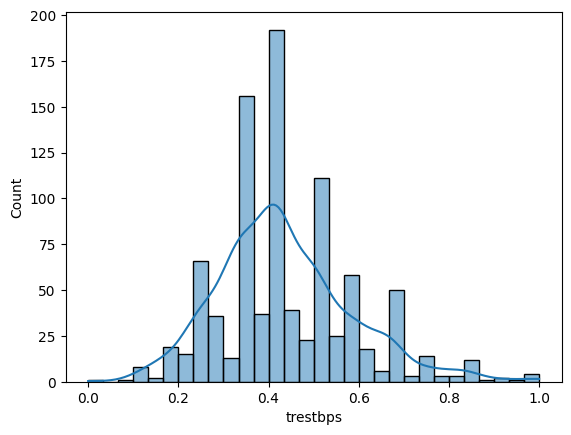

In [866]:
sns.histplot(data, x='trestbps', kde=True)

In [868]:
data.groupby('trestbps_bins')['sex'].value_counts()

trestbps_bins  sex
very_low       1      725
               0      194
low            0        0
               1        0
Normal         0        0
               1        0
high           0        0
               1        0
very_high      0        0
               1        0
Name: count, dtype: int64

In [870]:
bins=[0,1,2,3,4]
labels=['No-Heart-Disease', 'Mild-Heart-Disease', 'Moderate-Heart-Disease', 'Severe-Heart-Disease']
data['num_bins']=pd.cut(data['num'], bins=bins, labels=labels)
data['num_bins'].fillna(data['num_bins'].mode()[0], inplace=True)
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,trestbps_bins,num_bins
0,1.0,0.714286,1,0,3,0.541667,0.386401,1,0,0.633803,0,0.556818,0,0,0,0,very_low,No-Heart-Disease
1,2.0,0.795918,1,0,0,0.666667,0.474295,0,0,0.338028,1,0.465909,1,3,1,2,very_low,Mild-Heart-Disease
2,3.0,0.795918,1,0,0,0.333333,0.379768,0,0,0.485915,1,0.590909,1,2,2,1,very_low,No-Heart-Disease
3,4.0,0.183673,1,0,2,0.416667,0.414594,0,1,0.894366,0,0.693182,0,0,1,0,very_low,No-Heart-Disease
4,5.0,0.265306,0,0,1,0.416667,0.338308,0,0,0.788732,0,0.454545,2,0,1,0,very_low,No-Heart-Disease


## Encode non-numerical cols

In [873]:
sex=LabelEncoder()
data['sex']=sex.fit_transform(data[['sex']])
dataset=LabelEncoder()
data['dataset']=dataset.fit_transform(data[['dataset']])
cp=LabelEncoder()
data['cp']=cp.fit_transform(data[['cp']])
fbs=LabelEncoder()
data['fbs']=fbs.fit_transform(data[['fbs']])
exang=LabelEncoder()
data['exang']=exang.fit_transform(data[['exang']])
restecg=LabelEncoder()
data['restecg']=restecg.fit_transform(data[['restecg']])
slope=LabelEncoder()
data['slope']=slope.fit_transform(data[['slope']])
thal=LabelEncoder()
data['thal']=thal.fit_transform(data[['thal']])
trestbps_bins=LabelEncoder()
data['trestbps_bins']=trestbps_bins.fit_transform(data[['trestbps_bins']])
num_bins=LabelEncoder()
data['num_bins']=num_bins.fit_transform(data[['num_bins']])


## Scale Numeric col in original data

In [876]:
numeric_cols=['id','age','trestbps','chol','thalch','oldpeak','ca','num']
scalar=StandardScaler()
data[numeric_cols]=scalar.fit_transform(data[numeric_cols])

In [878]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
pt_boxcox=PowerTransformer(standardize=True)
data[numeric_cols]=pt_boxcox.fit_transform(data[numeric_cols])
pt_yeojohnson=PowerTransformer(standardize=True)
data[numeric_cols]=pt_yeojohnson.fit_transform(data[numeric_cols])
qt_normal=QuantileTransformer(output_distribution='normal', random_state=42)
data[numeric_cols]=qt_normal.fit_transform(data[numeric_cols])

In [880]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,trestbps_bins,num_bins
0,-5.199338,1.025747,1,0,3,0.834251,0.185367,1,0,0.457852,0,1.283416,0,-5.199338,0,-5.199338,0,2
1,-3.064732,1.498563,1,0,0,1.446104,0.987231,0,0,-1.156989,1,0.664241,1,5.199338,1,0.824622,0,0
2,-2.851066,1.498563,1,0,0,-0.688266,0.123185,0,0,-0.380326,1,1.449999,1,1.710649,2,0.231414,0,2
3,-2.719607,-1.681878,1,0,2,-0.001365,0.435226,0,1,2.377526,0,2.007821,0,-5.199338,1,-5.199338,0,2
4,-2.623052,-1.206386,0,0,1,-0.001365,-0.380326,0,0,1.351702,0,0.562062,2,-5.199338,1,-5.199338,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,2.623052,-0.036871,0,3,0,-0.293601,1.654435,1,2,0.605778,0,-0.792439,1,-5.199338,1,0.231414,0,2
916,2.719607,0.885630,1,3,3,-0.001365,-0.859657,0,2,0.025943,0,0.001365,1,-5.199338,1,-5.199338,0,2
917,2.851066,0.087489,1,3,0,-0.457852,-0.008192,1,2,-1.379450,0,-0.792439,1,-5.199338,0,0.824622,0,0
918,3.064732,0.420265,1,3,0,-0.001365,2.061917,1,0,0.025943,0,0.001365,1,-5.199338,1,-5.199338,0,2


In [882]:
X=data.drop('num', axis=1)
y=data['num']
X = X.drop('id', axis=1)
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

In [884]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [463]:
print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

          -5       0.79      0.87      0.83        82
           0       0.64      0.72      0.68        75
           1       0.25      0.05      0.08        21
           5       1.00      0.83      0.91         6

    accuracy                           0.71       184
   macro avg       0.67      0.62      0.62       184
weighted avg       0.67      0.71      0.68       184



In [465]:
coefficients = log_model.coef_[0]
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance_df['Absolute_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

In [467]:
importance_df

,Feature,Coefficient,Absolute_Coefficient
1,sex,-0.847656,0.847656
9,exang,-0.731280,0.731280
10,oldpeak,-0.664025,0.664025
13,thal,-0.424587,0.424587
15,num_bins,0.385773,0.385773
3,cp,0.378553,0.378553
6,fbs,-0.316723,0.316723
0,age,-0.293667,0.293667
7,restecg,0.269956,0.269956
12,ca,-0.210693,0.210693


In [95]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [97]:
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression Metrics:\n")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Random Forest Regression Metrics:

Mean Absolute Error (MAE): 0.61
Root Mean Squared Error (RMSE): 0.86
R-squared (R2): 0.38


In [99]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [101]:
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBClassifier Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBClassifier Accuracy: 0.57

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       117
           1       0.56      0.45      0.50        87
           2       0.30      0.27      0.29        33
           3       0.38      0.41      0.39        34
           4       0.00      0.00      0.00         5

    accuracy                           0.57       276
   macro avg       0.39      0.39      0.39       276
weighted avg       0.56      0.57      0.56       276



* Keytake away's
    * None of the models performed that well.
    * XGBClassifer performed the best out of the three with a accuracy of 0.57
    * models are actually quite good at determining control samples.
    * XGBClassifer/logistic regression has good percision recall and f1 score for control samples
    * Poor model performance could be explained by the class imblance.

# Detecting diseased versus non diseased
* Follow up to above results. What if I only want to detect whether someone has heart disease or not? 

In [104]:
y = np.where((y == 1) | (y == 2) | (y == 3) | (y == 4), 1,0)

In [106]:
X_train ,X_test ,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

In [108]:
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       117
           1       0.80      0.77      0.78       159

    accuracy                           0.76       276
   macro avg       0.75      0.76      0.75       276
weighted avg       0.76      0.76      0.76       276



In [110]:
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression Metrics:\n")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Random Forest Regression Metrics:

Mean Absolute Error (MAE): 0.63
Root Mean Squared Error (RMSE): 0.86
R-squared (R2): -1.99


In [112]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBClassifier Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBClassifier Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       117
           1       0.84      0.81      0.82       159

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276



* KeyTake Away's
    * Here we see that the models are performing quite well.
    * Both Logistic regression XGBClassifer are performing very well at determining healthy vs. diseased.
    * XGBClassifer performs the best with a accuracy of .80 compared to logistic regression of 0.76
    * RandomForest agian performs the worst could be due to class imbalance.
    

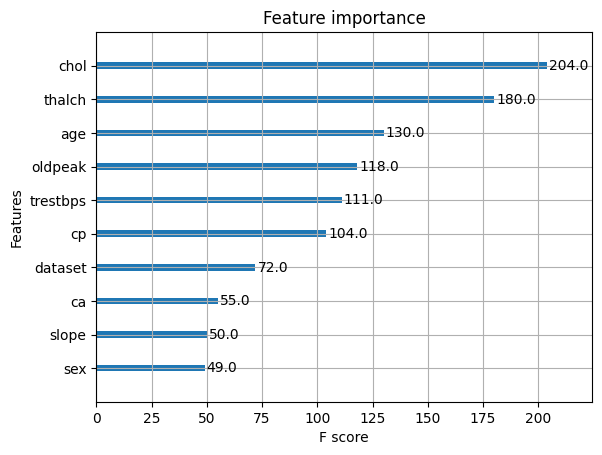

In [115]:
from xgboost import plot_importance
plot_importance(xgb_model, max_num_features=10)
plt.show()

* Seems Cholestrol levels, thalch (max heart rate), and age play a large role in the models performance.
* High cholesterol levels and abnormal heart rate responses are often associated with cardiac conditions, which might be why these features are dominant.
* As a person ages their risk of heart disease increases.
* oldpeak has an F score of 118, indicating that it also plays a notable role in the predictions, particularly in understanding the effects of exercise.
* trestbps (Resting Blood Pressure) and cp (Chest Pain Type): These features have scores of 111 and 104 respectively, indicating that resting blood pressure and chest pain type contribute moderately to the model’s decision-making process.
* The remaining features seem to play very little to the models performance. Interestingly dataset factors in a small amount to model performance but this is likely due to the imblanced contribution observed.

# Conclusion
* Goal: The goal of this experiment was to determine whether it is possible to build a classifier that can differentiate between diseased and non-diseased individuals. In short, the answer is yes.
* Summary: In this notebook, I successfully developed a model to classify individuals as either diseased or non-diseased.
 * Best Model: The XGBClassifier performed the best out of the three models implemented.
    * With an accuracy of 0.80, the XGBClassifier achieved the following scores:
    * Non-Diseased Individuals: Precision = 0.75, Recall = 0.79, F1-Score = 0.77.
    * Diseased Individuals: Precision = 0.84, Recall = 0.81, F1-Score = 0.82.
    * We see that the most important 3 features to the models performance are Cholestrol levels, Max Heart rate and age. Which make sense from a biological persepective. 
* Future Improvements: It is important to note that these model performances could likely be further improved through better imputation techniques and by using a more diverse dataset. In this experiment I only implimented a very simple imputer.

# Link to Kaggle dataset
*  https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data
# Acknowledgements:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
# Relevant Papers:

* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.Web Link
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link

# Citation Request:

* The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.
